<div>
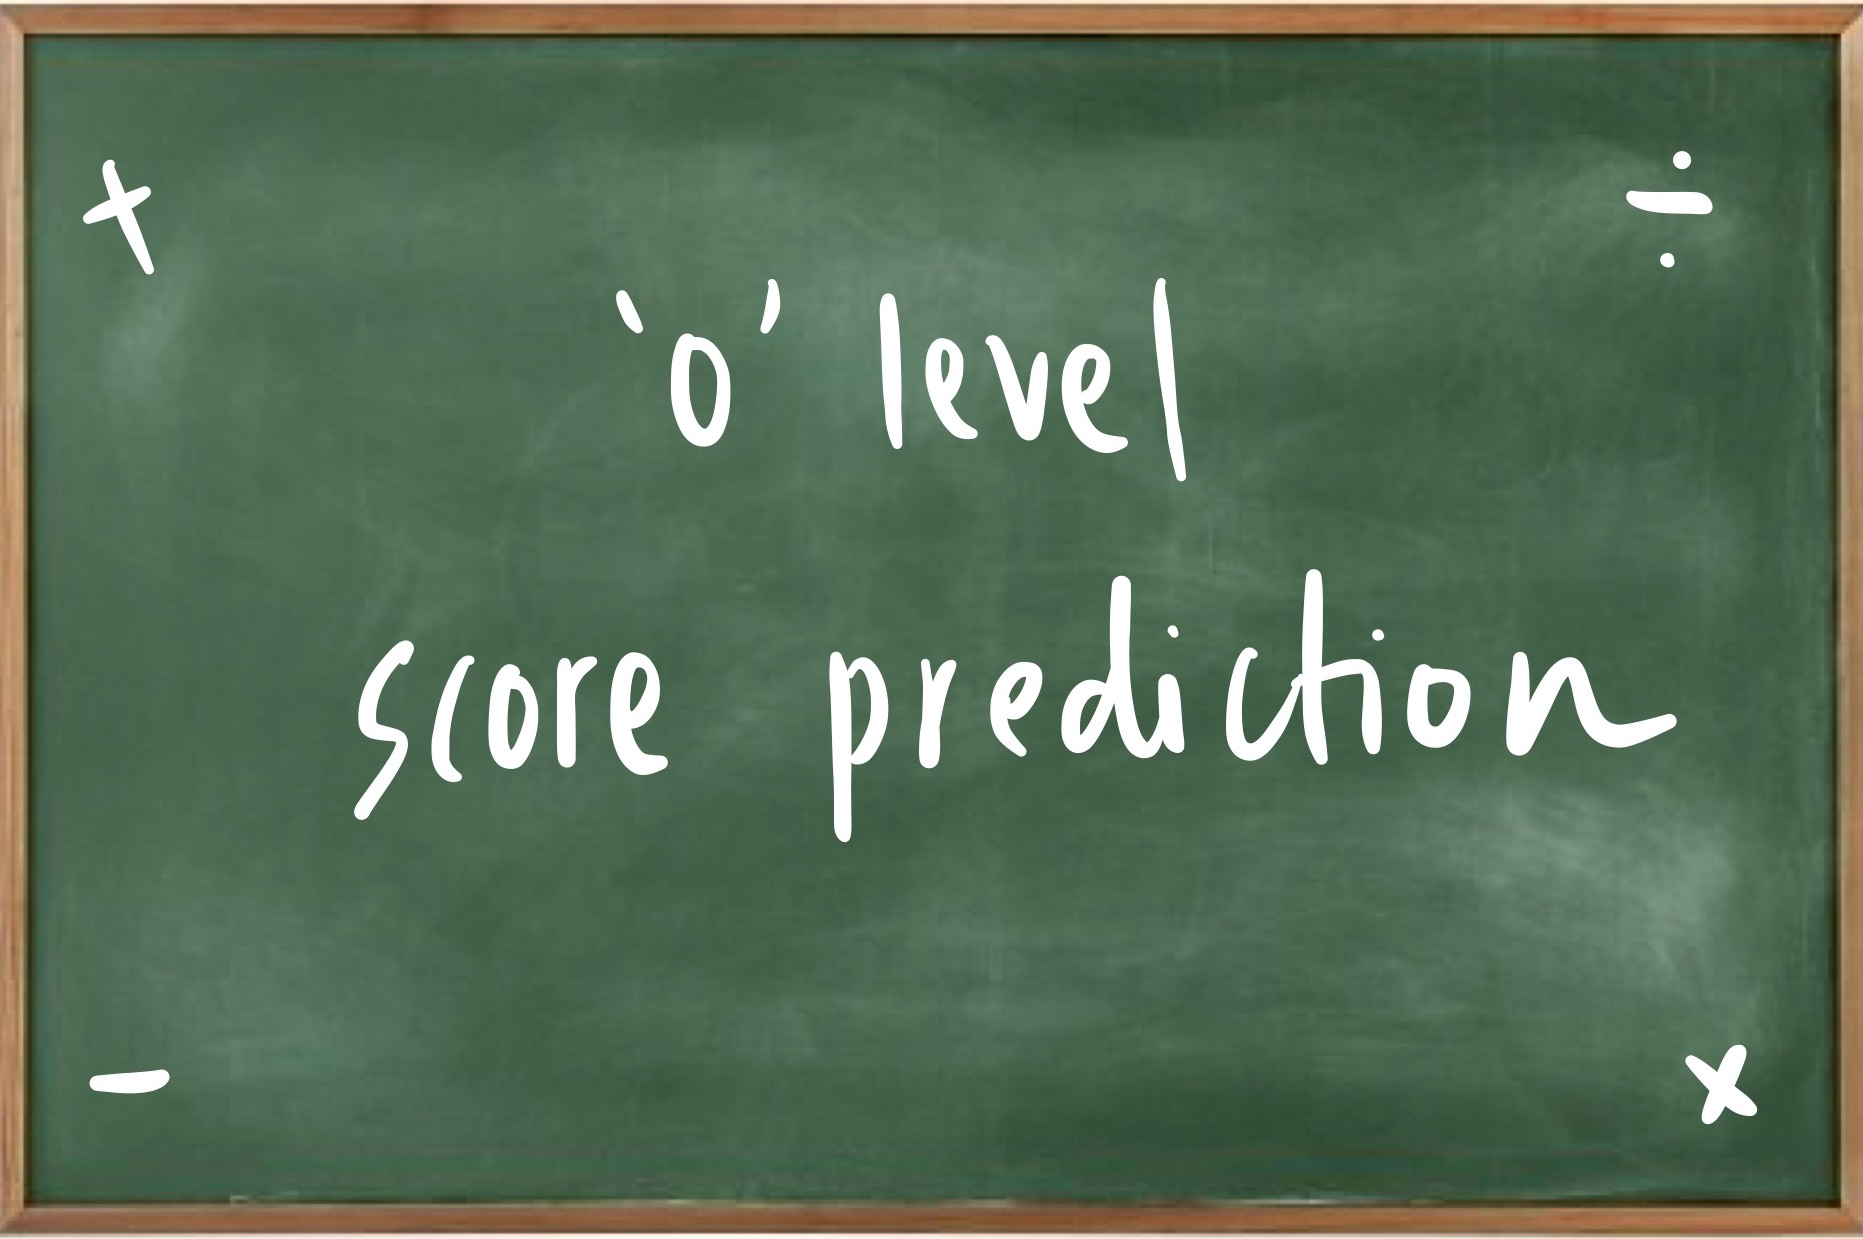
</div>

cover image can be seen in web jupyter notebook, i have attached it as part of the project folder too!

<p style="font-family: times, serif; font-size:12pt; font-style:italic">
    GOAL : predict 'o' level mathematics score to help school identify weaker students
</p>

In [51]:
# !python -m wget https://techassessment.blob.core.windows.net/aiap9-assessment-data/score.db
# downloads data.db file to same directory

In [52]:
# pip install sklearn

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

In [2]:
#create connection to database file
database = "score.db"
connection = sql.connect(database)

In [3]:
query = '''SELECT * FROM score'''

In [4]:
scores_df = pd.read_sql_query(query, connection)
scores_df.head()

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow


In [5]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15900 entries, 0 to 15899
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               15900 non-null  int64  
 1   number_of_siblings  15900 non-null  int64  
 2   direct_admission    15900 non-null  object 
 3   CCA                 15900 non-null  object 
 4   learning_style      15900 non-null  object 
 5   student_id          15900 non-null  object 
 6   gender              15900 non-null  object 
 7   tuition             15900 non-null  object 
 8   final_test          15405 non-null  float64
 9   n_male              15900 non-null  float64
 10  n_female            15900 non-null  float64
 11  age                 15900 non-null  float64
 12  hours_per_week      15900 non-null  float64
 13  attendance_rate     15122 non-null  float64
 14  sleep_time          15900 non-null  object 
 15  wake_time           15900 non-null  object 
 16  mode

<p style="font-family: times, serif; font-size:18pt; font-style: bold">
    Handling missing data
</p>

<p style="font-family: times, serif; font-size:12pt; font-style:italic">
   I have decided to remove rows with null data as students have neither given a response to the score nor attendance rate which are important variables. Alternatively, we could have done imputation with either mode or mean but it might introduce bias to our results
</p>

In [6]:
scores_df = scores_df.dropna(how = 'any')
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14648 entries, 0 to 15899
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               14648 non-null  int64  
 1   number_of_siblings  14648 non-null  int64  
 2   direct_admission    14648 non-null  object 
 3   CCA                 14648 non-null  object 
 4   learning_style      14648 non-null  object 
 5   student_id          14648 non-null  object 
 6   gender              14648 non-null  object 
 7   tuition             14648 non-null  object 
 8   final_test          14648 non-null  float64
 9   n_male              14648 non-null  float64
 10  n_female            14648 non-null  float64
 11  age                 14648 non-null  float64
 12  hours_per_week      14648 non-null  float64
 13  attendance_rate     14648 non-null  float64
 14  sleep_time          14648 non-null  object 
 15  wake_time           14648 non-null  object 
 16  mode

<p style="font-family: times, serif; font-size:12pt; font-style:italic">
    We have 7 numerical features and 10 categorical features. However, not all are relevant in training our model. let's explore each of the features are to select the most relevant features for our training model later. But first, let's have a look at the distribution plot of our target variable which is the final test score.
</p>

Text(0.5, 1.0, 'Distribution of Mathematics score')

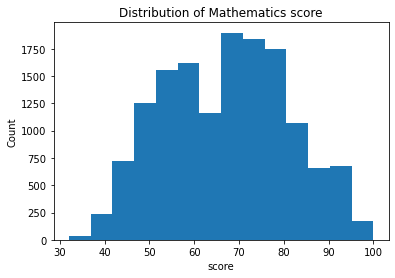

In [7]:
plt.hist(scores_df['final_test'], bins = 14)
plt.xlabel('score')
plt.ylabel('Count')
plt.title('Distribution of Mathematics score')


<p style="font-family: times, serif; font-size:12pt; font-style:italic">
    Final test score is our target variable, let's take a look at it's distribution, it appears normally distributed with a mode of 70.
</p>

<function matplotlib.pyplot.show(close=None, block=None)>

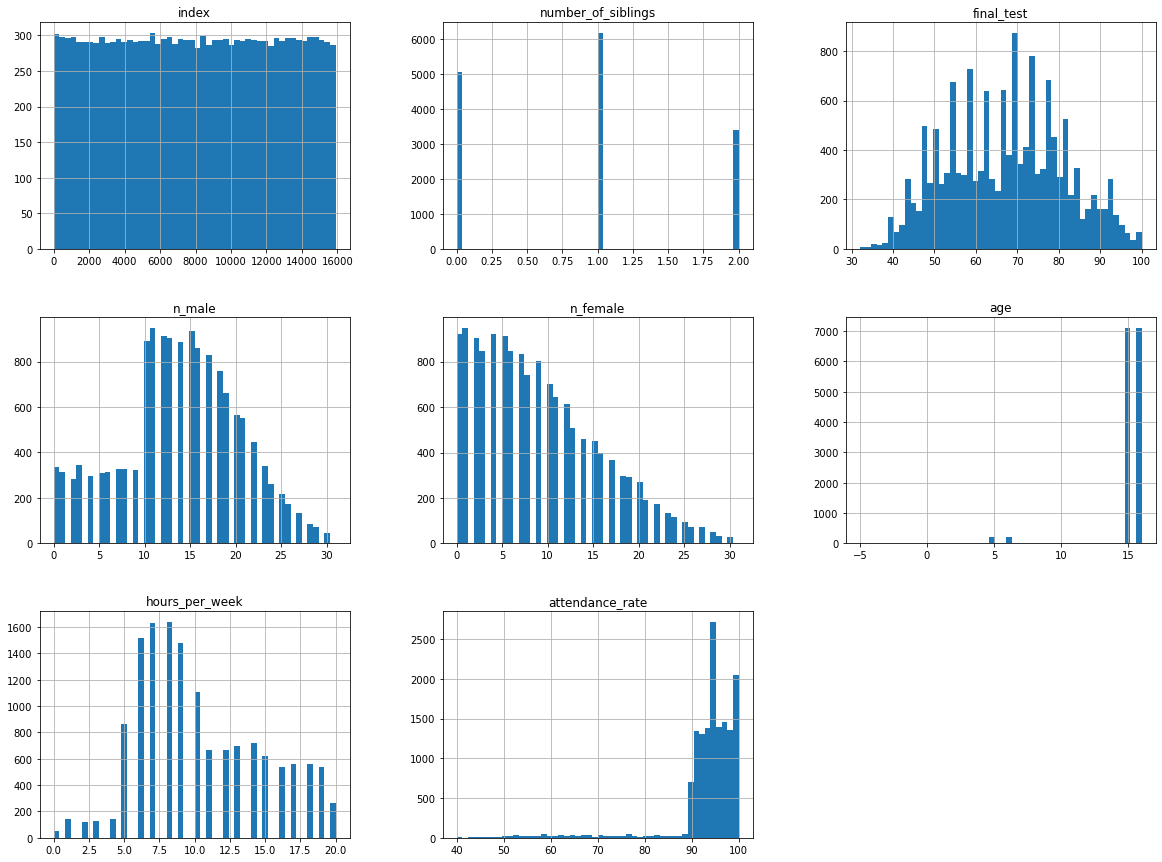

In [8]:
scores_df.hist(bins = 50, figsize = (20,15))
plt.show

<p style="font-family: times, serif; font-size:18pt; font-style:bold">
    Histogram of numerical attributes
</p>

1. Number of siblings: most participants have 1 siblings, followed by being the only child and a few have 2 sibling. This is representative of a singapore household given the high cost of raising a child in Singapore

2. We can see that the number of male classmates in a class is more than the number of female classmates in the class. 


<b> a balanced mix of students in a class might help students perform better as each student have different strengths so this might be a good attribute to look at </b>


3. Our participants are mostly aged 15 to 16 which is around the age when they take the o levels depending on the stream (i.e express, normal academic, retainees) in secondary school

4. We can see that the survey respondents typically spend aournd 8 hours studying for mathematics in a week.

5. most of our the survery respondents attend school and there are those who do not. The group of students who do not attend schools are a cause of worry as they might be missing out on crucial content which might be useful when it comes to exam preparation

6. Our participants are mostly sleeping well with most of them having up to 8 hours of sleep a day while there are some who sleep less than 7 hours which is a cause of concern as a lack of sleep might contribute to poor examination performance as well





<p style="font-family: times, serif; font-size:18pt; font-style:bold">
    Numerical attributes
</p>

1) Transform the sleep and wake time to number of hours sleep , drop bag_color column

2) 419 responses which seemed to have keyed in either 5 or 6 as their age. As this dataset was obtained from students taking o level, it could be a result of mistyping when keying in their responses. Therefore, i am going to replace these response with either 15 or 16. I will also be removing rows with negative numbers

In [9]:
scores_df.loc[scores_df['age'] == 5, 'age'] = 15
scores_df.loc[scores_df['age'] == 6, 'age'] = 16

In [10]:
scores_df.drop(scores_df[scores_df['age'] < 0].index, inplace = True)

In [11]:
#https://stackoverflow.com/questions/39787787/how-to-get-the-difference-between-two-24-hour-times

import datetime

def numSleep(wake_time, sleep_time):
        t1 = datetime.datetime.strptime(str(wake_time), '%H:%M')
        t2 = datetime.datetime.strptime(str(sleep_time), '%H:%M')
        td = t1 - t2
        diff = abs(td.total_seconds())
        
        if diff > 43200:
            return 86400 - abs(td.total_seconds())
        
        else:
            return diff

scores_df['sleepHours'] = scores_df.apply(lambda x: numSleep(x['wake_time'],x['sleep_time']), axis = 1)

In [12]:
scores_df['sleepHours'] = scores_df['sleepHours'] / 3600

In [13]:
scores_df

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color,sleepHours
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow,8.0
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green,8.0
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white,8.0
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow,8.0
5,5,0,No,Arts,Visual,BA6R14,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,22:30,6:30,private transport,red,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black,8.0
15896,15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white,8.0
15897,15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red,8.0
15898,15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk,yellow,8.0


In [14]:
scores_df = scores_df.drop(columns = ['sleep_time','wake_time','bag_color'])

<p style="font-family: times, serif; font-size:18pt; font-style:bold">
    categorical attributes
</p>

1. There are a couple of duplicate response in the survey so let's clean them up

2. we can see that in CCA and tuition, there are similar answers just type different. some have responed by typing in cats while others have response in short hand form

In [15]:
categorical_cols = scores_df.loc[: , scores_df.dtypes == object]
categorical_cols.nunique()
categorical_cols = categorical_cols.drop(columns = 'student_id')

In [16]:
def unique_cat(arr):
    for i in arr:
        print(i , scores_df[i].unique())

In [17]:
unique_cat(['CCA', 'learning_style', 'tuition','mode_of_transport'])

CCA ['Sports' 'None' 'Arts' 'ARTS' 'Clubs' 'SPORTS' 'CLUBS' 'NONE']
learning_style ['Visual' 'Auditory']
tuition ['No' 'Yes' 'Y' 'N']
mode_of_transport ['private transport' 'public transport' 'walk']


In [18]:
#replacing Y or N response in our dataframe with yes or no
scores_df['tuition'] = scores_df['tuition'].replace({'Y': 'Yes', 'N': 'No'}) 

#replacing response which have been typed in capital letters
scores_df['CCA'] = scores_df['CCA'].replace({'SPORTS': 'Sports', 'NONE': 'None','ARTS': 'Arts','CLUBS': 'Clubs'}) 

In [19]:
scores_df

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,sleepHours
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,private transport,8.0
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,private transport,8.0
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,private transport,8.0
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,public transport,8.0
5,5,0,No,Arts,Visual,BA6R14,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,private transport,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,private transport,8.0
15896,15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,private transport,8.0
15897,15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,walk,8.0
15898,15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,walk,8.0


In [20]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14643 entries, 0 to 15899
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               14643 non-null  int64  
 1   number_of_siblings  14643 non-null  int64  
 2   direct_admission    14643 non-null  object 
 3   CCA                 14643 non-null  object 
 4   learning_style      14643 non-null  object 
 5   student_id          14643 non-null  object 
 6   gender              14643 non-null  object 
 7   tuition             14643 non-null  object 
 8   final_test          14643 non-null  float64
 9   n_male              14643 non-null  float64
 10  n_female            14643 non-null  float64
 11  age                 14643 non-null  float64
 12  hours_per_week      14643 non-null  float64
 13  attendance_rate     14643 non-null  float64
 14  mode_of_transport   14643 non-null  object 
 15  sleepHours          14643 non-null  float64
dtypes: f

In [21]:
#finding correlations amongst numerical attributes

num_corr = scores_df.corr()['final_test'].sort_values(ascending = False)

In [22]:
# one hot encoding for our categorical variables

dummy_df = pd.get_dummies(categorical_cols)

dummy_df['final_test'] = scores_df['final_test']

dummy_df

,direct_admission_No,direct_admission_Yes,CCA_ARTS,CCA_Arts,CCA_CLUBS,CCA_Clubs,CCA_NONE,CCA_None,CCA_SPORTS,CCA_Sports,...,gender_Female,gender_Male,tuition_N,tuition_No,tuition_Y,tuition_Yes,mode_of_transport_private transport,mode_of_transport_public transport,mode_of_transport_walk,final_test
0,0,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,69.0
1,1,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,47.0
2,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,85.0
4,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,66.0
5,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,1,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,56.0
15896,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,85.0
15897,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,76.0
15898,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,45.0


In [23]:
cat_corr = dummy_df.corr()['final_test'].sort_values(ascending= False)
cat_corr

final_test                             1.000000
CCA_None                               0.387316
learning_style_Visual                  0.270522
tuition_Yes                            0.251972
direct_admission_Yes                   0.236412
CCA_NONE                               0.062516
tuition_Y                              0.051645
gender_Male                            0.014746
mode_of_transport_private transport    0.003671
mode_of_transport_walk                -0.000085
mode_of_transport_public transport    -0.003598
gender_Female                         -0.014746
CCA_ARTS                              -0.017061
CCA_SPORTS                            -0.021838
CCA_CLUBS                             -0.040127
tuition_N                             -0.047663
CCA_Arts                              -0.123550
CCA_Sports                            -0.128476
CCA_Clubs                             -0.130301
direct_admission_No                   -0.236412
tuition_No                            -0

<p style="font-family: times, serif; font-size:18pt; font-style: bold">
    Categorical attributes
</p>

we can see that students who do not have cca tend to do better.

students who recived tuition also do better giving them an advantage over students who do not. schools might want to provide additional lessons for weaker students in a smaller class size so that students are able to understand a particular concept better. 

It seems that students who came into the school via DSA tend to do better as well. This is a little surprising as students who enter via DSA typically enter through non-acedmic achievements. It could be that students have learnt to handle both non acedmic and academic pursuit which results in them optimising their times and staying focus while revising which could lead to better results. It is indeed very interesting.


<p style="font-family: times, serif; font-size:12pt; font-style:italic">
    we now look at the most correlated attributes
</p>

In [24]:
num_corr.to_dict()

{'final_test': 1.0,
 'attendance_rate': 0.34943969278748355,
 'sleepHours': 0.32767609763952665,
 'index': 0.014653653384680975,
 'age': 0.0039246735646140994,
 'n_male': -0.1471512204723833,
 'hours_per_week': -0.14813934264434736,
 'n_female': -0.1725567353462642,
 'number_of_siblings': -0.36446613946665507}

In [25]:
#https://stackoverflow.com/questions/46679493/python-sort-dictionary-by-absolute-value

from collections import OrderedDict

def merge_dict(dict1, dict2):
    return dict2.update(dict1)

nd = num_corr.to_dict()
cd = cat_corr.to_dict()

cd.update(nd)

sorted_pairs = sorted(cd.items(), key=lambda k: abs(k[1]), reverse=True)
ordered_dict = OrderedDict(sorted_pairs)

ordered_dict

OrderedDict([('final_test', 1.0),
             ('CCA_None', 0.38731557279900136),
             ('number_of_siblings', -0.36446613946665507),
             ('attendance_rate', 0.34943969278748355),
             ('sleepHours', 0.32767609763952665),
             ('learning_style_Visual', 0.27052161342281233),
             ('learning_style_Auditory', -0.27052161342281233),
             ('tuition_No', -0.2570162280551075),
             ('tuition_Yes', 0.25197174725398647),
             ('direct_admission_Yes', 0.23641196553745294),
             ('direct_admission_No', -0.23641196553745294),
             ('n_female', -0.1725567353462642),
             ('hours_per_week', -0.14813934264434736),
             ('n_male', -0.1471512204723833),
             ('CCA_Clubs', -0.13030061540802),
             ('CCA_Sports', -0.1284760635781215),
             ('CCA_Arts', -0.12355002694749616),
             ('CCA_NONE', 0.06251610247992878),
             ('tuition_Y', 0.051644984129851426),
             ('

In [26]:
import itertools
import collections

d = collections.OrderedDict(ordered_dict)
x = itertools.islice(d.items(), 0, 8)

most_correlated = []

for key, value in x:
     most_correlated.append(key)
        
most_correlated

['final_test',
 'CCA_None',
 'number_of_siblings',
 'attendance_rate',
 'sleepHours',
 'learning_style_Visual',
 'learning_style_Auditory',
 'tuition_No']

In [58]:
df = pd.concat([scores_df, dummy_df], axis=1)
final_df = df[most_correlated]

# https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
final_df = final_df.loc[:,~final_df.columns.duplicated()]
final_df

,final_test,CCA_None,number_of_siblings,attendance_rate,sleepHours,learning_style_Visual,learning_style_Auditory,tuition_No
0,69.0,0,0,91.0,8.0,1,0,1
1,47.0,0,2,94.0,8.0,0,1,1
2,85.0,1,0,92.0,8.0,1,0,1
4,66.0,0,0,95.0,8.0,0,1,1
5,57.0,0,0,96.0,8.0,1,0,1
...,...,...,...,...,...,...,...,...
15895,56.0,0,1,96.0,8.0,1,0,1
15896,85.0,1,1,91.0,8.0,0,1,0
15897,76.0,0,1,93.0,8.0,0,1,0
15898,45.0,0,1,94.0,8.0,1,0,0


In [59]:
final_df.to_csv (r'/Users/bingxiann/Desktop/aiap/final_dataframe.csv', header=True)

print (df)

       index  number_of_siblings direct_admission     CCA learning_style  \
0          0                   0              Yes  Sports         Visual   
1          1                   2               No  Sports       Auditory   
2          2                   0              Yes    None         Visual   
4          4                   0               No  Sports       Auditory   
5          5                   0               No    Arts         Visual   
...      ...                 ...              ...     ...            ...   
15895  15895                   1               No   Clubs         Visual   
15896  15896                   1              Yes    None       Auditory   
15897  15897                   1              Yes  Sports       Auditory   
15898  15898                   1               No   Clubs         Visual   
15899  15899                   2              Yes    None         Visual   

      student_id  gender tuition  final_test  n_male  ...  gender_Female  \
0         A

<p style="font-family: times, serif; font-size:12pt; font-style:italic">
    This is our final cleaned dataset which i have included in the input folders of our project file
</p>

In [60]:
labels = final_df['final_test']

X_train, X_test, y_train, y_test = train_test_split(final_df, labels, 
                                                        test_size = 0.2,
                                                        random_state=42)

The above cell needs to be re run before we run our functions with the training models

In [39]:
y_train.shape

(11714,)

In [40]:
train_csv = X_train

In [41]:
test_csv = X_test

In [42]:
# train_csv.to_csv (r'/Users/bingxiann/Desktop/aiap/train_dataframe.csv', header=True)
# test_csv.to_csv (r'/Users/bingxiann/Desktop/aiap/test_dataframe.csv', header=True)


In [43]:
#need to drop final test somewhere here as well for results to be valid

In [44]:
from sklearn.linear_model import LinearRegression

# X_train = X_train.drop(columns='final_test')
# X_test = X_test.drop(columns='final_test')
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(31.59103647219652,
 array([ 9.18153216, -5.36780514,  0.34929692,  1.07026057,  3.17735935,
        -3.17735935, -5.83039534]))

In [45]:
from sklearn.metrics import r2_score 

fitted_values = lin_reg.predict(X_test)

print(   r2_score(y_test, fitted_values)    )

0.41895106363446477


linear regression does not seem to be a very good ML model given that only 41 % of the variation in the dependent variable (y) that is predictable from the independent variable (features)

we need to re-run the cell which splits our training and test set before running function below

In [61]:
# function to help us run standard learning machine models on our dataset obtained from 
# https://github.com/WillKoehrsen/Data-Analysis/blob/master/bayesian_lr/Bayesian%20Linear%20Regression%20Project.ipynb

# The models to test out our models are LR, randomforestregressor, randomforrest classifier, svm classifier 
# and svm regressor


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR

# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression',
                      'Random Forest regressor', 'SVR']
    X_train = X_train.drop(columns='final_test')
    X_test = X_test.drop(columns='final_test')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = RandomForestRegressor(n_estimators=50)
    model3 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    
    # Dataframe for results
    results = pd.DataFrame(columns=['rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [ rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_rmse]
    
    return results


In [62]:
results = evaluate(X_train, X_test, y_train, y_test)

print(results)

                            rmse
Linear Regression        10.7228
Random Forest regressor  9.87634
SVR                      10.0265
Baseline                 14.0752


In [51]:
# model4 = RandomForestClassifier(n_estimators=50)
# model5 = SVC(kernel='rbf')
from sklearn.metrics import accuracy_score

clf = SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.13793103448275862


In [52]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8767497439399112


In [63]:
#for classification models
from sklearn.tree import DecisionTreeClassifier 

def evaluateClass(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['SVC',
                      'Random Forest classifier', 'Decision Tree Classifier']
    X_train = X_train.drop(columns='final_test')
    X_test = X_test.drop(columns='final_test')
    
    # Instantiate the models
    model1 = SVC(kernel = 'rbf')
    model2 = RandomForestClassifier(criterion = 'entropy', random_state = 42)
    model3 = DecisionTreeClassifier(max_depth = 2)
    
    # Dataframe for results
    class_results = pd.DataFrame(columns=['accuracy score'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(y_test, predictions) 
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        class_results.loc[model_name, :] = [accuracy]
    
    return class_results

In [64]:
results = evaluateClass(X_train, X_test, y_train, y_test)

print(results)

                         accuracy score
SVC                           0.0416524
Random Forest classifier      0.0727211
Decision Tree Classifier      0.0529191


In [55]:
pip freeze > requirements.txt 

Note: you may need to restart the kernel to use updated packages.
